<a href="https://colab.research.google.com/github/aweeeaja/Machine-learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # mengimport library drive dari google colab
drive.mount('/content/drive') # memasukan drive ke  dalam content

Mounted at /content/drive


Hasil Evaluasi Model:
Mean Absolute Error (MAE): 0.27858478389001695
Mean Squared Error (MSE): 0.15004419886963466
Root Mean Squared Error (RMSE) : 0.3873553909133506
Mean Absolute Percentage Error (MAPE) : 0.21571165137861945


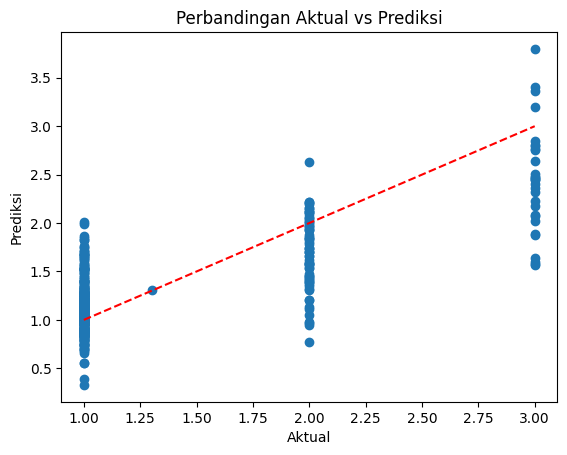

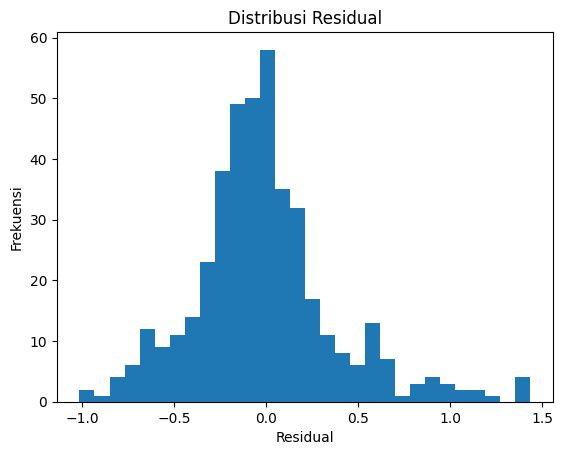

In [ ]:
import pandas as pd  # mengimport library pandas sebagai pd
from sklearn.model_selection import train_test_split # Mengimport fungsi train_test_split dari scikit-learn untuk membagi dataset menjadi data pelatihan dan pengujian.
from sklearn.preprocessing import MinMaxScaler # Mengimport kelas MinMaxScaler dari scikit-learn untuk melakukan normalisasi data.
from sklearn.linear_model import LinearRegression # Mengimport kelas LinearRegression dari scikit-learn untuk membangun model regresi linier.
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # Mengimport fungsi-fungsi metrik evaluasi yang digunakan untuk mengevaluasi performa model
import matplotlib.pyplot as plt


# Tahapan Preprocessing

# Memuat/membaca dataset
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/TB/dataset/Cardiotocographic_data.csv') #Membaca dataset dari file CSV yang terletak di direktori '/content/drive/MyDrive/Machine Learning/TB/dataset/Cardiotocographic_data.csv' menggunakan fungsi read_csv dari pandas, dan menyimpannya dalam objek DataFrame bernama data

# Memilih fitur
selected_features = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min',
                      'Max', 'Nmax', 'Nzeros', 'Mode' , 'Mean', 'Median', 'Variance', 'Tendency'] # menentukan fitur yang digunakan dalam analisis dan disimpan dalam variable "selected_features"
X = data[selected_features] # data yang sudah dipilih atau berada dalam "selected_feature" dimasukan ke dalam variabel x
y = data['NSP'] # memilih kolom "NSP" sebagai target variable dan disimpan dalam variabel y

# menangani data hilang
X_filled = X.fillna(X.mean()) # menggunakan metode fillna dari pandas untuk mengisi missing value pada variabel X dengan nilai rata - rata masing masing kolom
y_filled = y.fillna(y.mean()) # menggunakan metode fillna dari pandas untuk mengisi missing value pada variabel Y dengan nilai rata - rata masing masing kolom

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_filled, test_size=0.2, random_state=42) # Membagi data yang telah diisi missing values menjadi data pelatihan dan data pengujian menggunakan fungsi train_test_split dari scikit-learn. Data pelatihan disimpan dalam X_train dan y_train, sedangkan data pengujian disimpan dalam X_test dan y_test. Proporsi data pengujian ditentukan oleh test_size=0.2, yang berarti 20% data akan digunakan sebagai data pengujian


# Menormalisasi data
scaler = MinMaxScaler() # Membuat objek scaler dari kelas MinMaxScaler untuk melakukan normalisasi data.
X_train_scaled = scaler.fit_transform(X_train) # data pelatihan (X_train) dinormalisasi menggunakan metode fit_transform
X_test_scaled = scaler.transform(X_test) # data pengujian (X_test) dinormalisasi menggunakan metode transform.

# Mempersiapkan data untuk model
X_train_scaled = scaler.transform(X_train)  # data pelatihan (X_train) dinormalisasi menggunakan metode transform

# Membangun model Linear Regression
model = LinearRegression() # Membuat objek model Linear Regression dari kelas LinearRegression untuk membuat model
model.fit(X_train_scaled, y_train) # memanggil metode fit dengan isi data pelatihan yang sudah dinormalisasi (X_train_scaled) dan target variabel (y_train).


# Tahapan Evaluasi Model

# Melakukan prediksi menggunakan model
y_pred = model.predict(X_test_scaled) # Menggunakan model yang telah dilatih untuk melakukan prediksi pada data pengujian (X_test_scaled) dan menyimpan hasil prediksi dalam variabel y_pred.


# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred) # Menghitung MAE menggunakan fungsi yang telah diimport sebelumnya, dengan membandingkan nilai aktual (y_test) dengan nilai prediksi (y_pred)
mse = mean_squared_error(y_test, y_pred) #  Menghitung MSE menggunakan fungsi yang telah diimport sebelumnya, dengan membandingkan nilai aktual (y_test) dengan nilai prediksi (y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) #  Menghitung RMSE menggunakan fungsi yang telah diimport sebelumnya, dengan membandingkan nilai aktual (y_test) dengan nilai prediksi (y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) #  Menghitung MAPE menggunakan fungsi yang telah diimport sebelumnya, dengan membandingkan nilai aktual (y_test) dengan nilai prediksi (y_pred)

print("Hasil Evaluasi Model:") # menampilkan tulisan "Hasil Evaluasi Model" menggunakan fungsi print
print("Mean Absolute Error (MAE):", mae) # menampilkan tulisan "Mean Absolute Error (MAE):" lalu di ikuti dengan hasil perhitungan MAE
print("Mean Squared Error (MSE):", mse) # menampilkan tulisan "Mean Squared Error (MSE):" lalu di ikuti dengan hasil perhitungan MSE
print("Root Mean Squared Error (RMSE) :", rmse) # menampilkan tulisan "Root Mean Squared Error (RMSE)):" lalu di ikuti dengan hasil perhitungan RMSE
print("Mean Absolute Percentage Error (MAPE) :", mape) # menampilkan tulisan "Mean Absolute Percentage Error (MAPE):" lalu di ikuti dengan hasil perhitungan MAPE



# Membuat scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis referensi untuk nilai aktual = nilai prediksi
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Perbandingan Aktual vs Prediksi')
plt.show()

residuals = y_test - y_pred

plt.hist(residuals, bins=30)
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.title('Distribusi Residual')
plt.show()



